<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Gu%C3%ADa_sim2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sea $g(x) = \left\{ \begin{array}{lcc} x - 2 & si & x > 2 \\ \\ 0 & si & x \leq 2 \end{array} \right.$ y X una variable aleatoria que sigue una distribución normal con media 0 y desviación estándar 1. \\
A) Estime por simulación el valor esperado de $g(X)$. \\
B) Use la técnica de variables antitéticas para reducir la varianza, ¿En qué porcentaje se redujo la varianza?

In [ ]:
from random import gauss
from statistics import mean, variance
def g(x):
  if x>2:
    return x-2
  else:
    return 0
nr=100000
l=[]
l1=[]
for i in range(nr):
  x=gauss(0,1)
  l.append(g(x))
  l1.append((g(x)+g(-x))/2)
m=mean(l)
v=variance(l)
print(m,v)
m1=mean(l1)
v1=variance(l1)
print(m1,v1)
print(100*(v-v1)/v)

0.008393999279529826 0.005503152820444457
0.008469368951989393 0.0027716506648646296
49.63522265694995


In [ ]:
from random import gauss  # Para generar números aleatorios normales estándar
from statistics import mean, variance  # Para calcular media y varianza

# Definición de la función g(x)
def g(x):
    if x > 2:
        return x - 2  # Caso si x > 2
    else:
        return 0  # Caso si x <= 2

nr = 100000  # Número de simulaciones
l = []  # Lista para almacenar valores de g(X) sin reducción
l1 = []  # Lista para almacenar valores de g(X) con reducción (antitéticas)

# Ciclo para realizar las simulaciones
for i in range(nr):
    z = gauss(0, 1)  # Generar un número aleatorio normal estándar
    l.append(g(z))  # Evaluar g(z) y almacenar en la lista
    l1.append((g(z) + g(-z)) / 2)  # Evaluar el estimador con antitéticas y almacenar

# Calcular media y varianza sin reducción
m = mean(l)  # Media de g(X)
v = variance(l)  # Varianza de g(X)
print(m, v)  # Imprimir media y varianza sin reducción

# Calcular media y varianza con reducción
m1 = mean(l1)  # Media con reducción (antitéticas)
v1 = variance(l1)  # Varianza con reducción
print(m1, v1)  # Imprimir media y varianza con reducción

# Calcular y mostrar la reducción porcentual de varianza
print(100 * (v - v1) / v)

0.008253306838764145 0.005575405549735548
0.008388776980022465 0.002799137497377385
49.794907789081755


2. Con las mismas hipótesis del problema 1, use la técnica de variables de control para reducir la varianza. Use como variable de control a $g(e^x)$. ¿En qué porcentaje se redujo la varianza?

In [ ]:
from random import gauss
from statistics import mean, variance
from scipy.stats import pearsonr
from math import exp
def g(x):
  if x>2:
    return x-2
  else:
    return 0

#MOVER h(x) PARA REDUCIR LA VARIANZA

def f(x):
  return g(exp(x))
nr=100000
l=[]
l1=[]
l2=[]
for i in range(nr):
  x=gauss(0,1)
  l.append(g(x))
  l1.append((g(x)+g(-x))/2)
  l2.append(f(x))
m=mean(l)
v=variance(l)
print(m,v)
m1=mean(l1)
v1=variance(l1)
print(m1,v1)
print(100*(v-v1)/v)
r=100*pearsonr(l,l2)[0]**2
print(r)

0.008526674709763746 0.005607185532469404
0.00877834332761069 0.0028739486263732543
48.745255356164975
71.75054599542213


In [ ]:
# Resuelto en clase
#####################ESTE ESTA BIEN ######################

from random import gauss
from statistics import mean, variance
from scipy.stats import pearsonr
from math import exp
def g(x):
  if x>2:
    return x-2
  else:
    return 0

def f(x):
  return g(exp(x))
nr=100000
l=[]
l1=[]
lc=[]
for i in range(nr):
  x=gauss(0,1)
  l.append(g(x))
  l1.append((g(x)+g(-x))/2)
  lc.append(f(x))
m=mean(l)
v=variance(l)
print(m,v)
m1=mean(l1)
v1=variance(l1)
print(m1,v1)
print(100*(v-v1)/v)
r=pearsonr(l,lc)[0]
print(100*r**2)

0.008298680157914465 0.005482839240896421
0.008587720499921115 0.0028237760449505178
48.49792377846842
71.19853565463704


In [ ]:
from random import gauss
from statistics import mean, variance
from math import exp

# Definición de g(x)
def g(x):
    return x - 2 if x > 2 else 0

# Definición de h(x) = g(e^x)
def h(x):
    return g(exp(x))

nr = 100000  # Número de simulaciones
l = []  # Almacenará g(X)
lc = []  # Almacenará h(X)
cov_terms = []  # Términos para calcular la covarianza
adjusted = []  # Almacenará las estimaciones ajustadas

# Simulación
sum_l = 0  # Suma acumulativa de g(X) para la media
sum_lc = 0  # Suma acumulativa de h(X) para la media
for i in range(nr):
    z = gauss(0, 1)  # Genera una muestra Z ~ N(0, 1)
    gx = g(z)  # Calcula g(X)
    hx = h(z)  # Calcula h(X)
    l.append(gx)  # Guarda g(X)
    lc.append(hx)  # Guarda h(X)
    sum_l += gx  # Acumula g(X)
    sum_lc += hx  # Acumula h(X)

# Cálculo de las medias
m = sum_l / nr  # Media de g(X)
mean_lc = sum_lc / nr  # Media de h(X)

# Cálculo de la covarianza, ajuste y varianza ajustada
sum_cov = 0  # Acumulador para covarianza
sum_adjusted_sq = 0  # Acumulador para calcular la varianza ajustada
for i in range(nr):
    cov_terms.append((l[i] - m) * (lc[i] - mean_lc))  # Términos para covarianza
    sum_cov += cov_terms[-1]  # Acumula la covarianza
var_lc = variance(lc)  # Varianza de h(X)
beta = sum_cov / (nr * var_lc)  # Coeficiente beta

for i in range(nr):
    adjustment = l[i] - beta * (lc[i] - mean_lc)  # Ajusta g(X) usando h(X)
    adjusted.append(adjustment)  # Guarda el valor ajustado
    sum_adjusted_sq += (adjustment - m) ** 2  # Acumula para la varianza ajustada

var_adjusted = sum_adjusted_sq / (nr - 1)  # Varianza ajustada
v = variance(l)  # Varianza original

# Reducción de varianza
reduction_percentage = 100 * (v - var_adjusted) / v

# Resultados
print("Media original:", m)
print("Varianza original:", v)
print("Varianza ajustada:", var_adjusted)
print("Reducción de varianza (%):", reduction_percentage)

Media original: 0.008360612712994648
Varianza original: 0.0055170079979761305
Varianza ajustada: 0.00159578345157563
Reducción de varianza (%): 71.075201410601


3. Sea $g(x) = \left\{ \begin{array}{lcc} e^x - 2 & si & x > ln(2) \\ \\ 0 & si & x \leq ln(2) \end{array} \right.$ y X una variable aleatoria que sigue una distribución normal con media 0 y desviación estándar 1. \\
A) Estime por simulación el valor esperado de $g(X)$. \\
B) Use la técnica de variables antitéticas para reducir la varianza, ¿En qué porcentaje se redujo la varianza?

In [ ]:
#SOLIUCIÓN DEL PROFESOR
from random import gauss
from statistics import mean, variance
from math import exp, log
def g(x):
  if x>log(2):
    return exp(x)-2
  else:
    return 0
l=[]
l1=[]
nr=100000
for i in range(nr):
  x=gauss(0,1)
  l.append(g(x))
  l1.append((g(x)+g(-x))/2)
m=mean(l)
v=variance(l)
print(m,v)
m1=mean(l1)
v1=variance(l1)
print(m1,v1)
print(100*(v-v1)/v)

0.5354983680018143 3.224710611707874
0.5290088983876028 1.448616406468541
55.077630804789536


In [ ]:
from random import gauss
from statistics import mean, variance
import math

# Definición de la función g(x) según el enunciado
def g(x):
    if x > math.log(2):  # ln(2)
        return math.exp(x) - 2
    else:
        return 0

nr = 100000  # Número de simulaciones
l = []       # Lista para simulación estándar
l1 = []      # Lista para simulación con variables antitéticas

# Bucle de simulación
for i in range(nr):
    z = gauss(0, 1)  # Generar un número normal estándar
    l.append(g(z))   # Evaluar g(z)
    l1.append((g(z) + g(-z)) / 2)  # Evaluar promedio de g(z) y g(-z)

# Cálculo de medias y varianzas
m = mean(l)       # Media estándar
v = variance(l)   # Varianza estándar
m1 = mean(l1)     # Media con antitéticos
v1 = variance(l1) # Varianza con antitéticos

# Porcentaje de reducción de la varianza
print(m, v)
print(m1, v1)
print(100 * (v - v1) / v)


0.5260610023573326 3.232553882381987
0.5264358143046226 1.5091652232520796
53.3135323288095


4. Con las mismas hipótesis del problema 3, use la técnica de variables de control para reducir la varianza. Use como variable de control a $g(X)^2$, ¿En qué porcentaje se redujo la varianza?

0.5290845446319364 3.0537414363107946
0.5313126613388461 1.4178796802761942
53.56909843719036
52.06905216059102


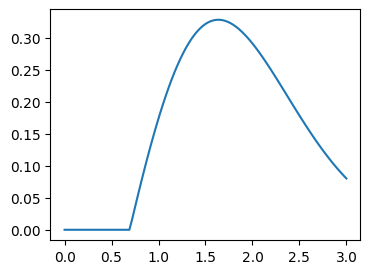

7.132248177013722 150.85972715483015


In [ ]:
#SOLIUCIÓN DEL PROFESOR
from random import gauss
from statistics import mean, variance
from math import exp, log,sqrt, pi
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def g(x):
  if x>log(2):
    return exp(x)-2
  else:
    return 0

def fc(x):
  return g(x)**2
def phi(x):
  return(1/sqrt(2*pi))*exp(-x**2/2)
def h(x):
  return (1/sqrt(2*pi))*exp(-x**2/2)
l=[]
l1=[]
l2=[]
nr=100000
lc=[]
for i in range(nr):
  x=gauss(0,1)
  l.append(g(x))
  l1.append((g(x)+g(-x))/2)
  lc.append(fc(x))
  x=gauss(1.7,1)
  l2.append(g(x)*phi(x)/h(x))
m=mean(l)
v=variance(l)
print(m,v)
m1=mean(l1)
v1=variance(l1)
print(m1,v1)
print(100*(v-v1)/v)
r=100*pearsonr(l,lc)[0]**2
print(r)
x1=0
x2=3
x=x1
b=[]
while x<x2:
  b.append(x)
  x=x+(x2-x1)/100
ly=[]
for x in b:
  ly.append(g(x)*phi(x))
plt.figure(figsize=(4,3))
plt.plot(b, ly)
plt.show()
m=mean(l2)
v=variance(l2)
print(m,v)

In [ ]:
#SOLIUCIÓN DEL PROFESOR
from random import gauss
from statistics import mean, variance
from math import exp, log,sqrt, pi
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def g(x):
  if x>log(2):
    return exp(x)-2
  else:
    return 0

def fc(x):
  return g(x)**2

l=[]
l1=[]
lc=[]
nr=100000

for i in range(nr):
  z=gauss(0,1)
  l.append(g(z))
  l1.append((g(z)+g(-z))/2)
  lc.append(fc(z))

m=mean(l)
v=variance(l)
print(m,v)
m1=mean(l1)
v1=variance(l1)

print(m1,v1)
print(100*(v-v1)/v)
r= pearsonr(l,lc)[0]
print(100*r**2)

0.5366369653238227 3.1601786205004
0.5376329417156132 1.4920486879736892
52.78593816518416
63.08789030444125


In [ ]:
from random import gauss
from statistics import mean, variance
import math

# Definición de la función g(x)
def g(x):
    if x > math.log(2):  # ln(2)
        return math.exp(x) - 2
    else:
        return 0

nr = 100000  # Número de simulaciones
l = []       # Lista para g(X)
l2 = []      # Lista para g(X)^2

# Bucle de simulación
for i in range(nr):
    z = gauss(0, 1)  # Generar un número normal estándar
    gx = g(z)
    l.append(gx)        # g(X)
    l2.append(gx ** 2)  # g(X)^2

# Cálculo de medias
m = mean(l)        # Media de g(X)
m2 = mean(l2)      # Media de g(X)^2
v = variance(l)    # Varianza de g(X)
v2 = variance(l2)  # Varianza de g(X)^2

# Coeficiente de regresión c para la variable de control
cov_g_g2 = sum((l[i] - m) * (l2[i] - m2) for i in range(nr)) / (nr - 1)
c = cov_g_g2 / v2

# Nueva estimación usando la técnica de variables de control
adjusted_l = [l[i] - c * (l2[i] - m2) for i in range(nr)]
m_adjusted = mean(adjusted_l)
v_adjusted = variance(adjusted_l)

# Porcentaje de reducción de la varianza
reduccion_varianza = 100 * (v - v_adjusted) / v

print(m, v)
print(m_adjusted, v_adjusted)
print(reduccion_varianza)


0.5397784671403169 3.363662889539407
0.5397784671403169 1.6790698947132265
50.0820994893711


5. X sigue una distribución normal estándar, Y sigue una distribución normal con media 1 y varianza 1, y X y Y son independientes. \\
A) Estime por simulación la probabilidad de que $X + Y > 2$. \\
B) Use la variable aleatoria $E(I|Y)$, donde $I = \left\{ \begin{array}{lcc} 1 & si & X + Y > 2 \\ \\ 0 & \text{en caso contrario} \end{array} \right.$, para reducir la varianza por condicionamiento. ¿En qué porcentaje se redujo la varianza?

In [ ]:
from random import gauss
from math import exp, sqrt
from statistics import mean, variance
from scipy.stats import pearsonr

def I(x,y):
  if x + y > 2:
    return 1
  else:
    return 0

nr = 1000000
l = []

for i in range(nr):
  x = gauss(0,1)
  y = gauss(1,1)
  l.append(I(x,y))

m = mean(l)
v = variance(l)
print(m,v)

0.239183 0.18197467448567448


In [8]:
from random import gauss
from math import exp, sqrt
from statistics import mean, variance
from scipy.stats import pearsonr, norm

def I(x,y):
  if x + y > 2:
    return 1
  else:
    return 0

nr = 1000000
l = []
l1 = []

for i in range(nr):
  x = gauss(0,1)
  y = gauss(1,1)
  l.append(I(x,y))
  q = 2 - y
  l1.append(1 - norm.cdf(q, 0, 1))

m = mean(l)
v = variance(l)
print(m,v)
m1 = mean(l1)
v1 = variance(l1)
print(m1,v1)
print(100 * (v - v1) / v)

0.240731 0.18277976841876842
0.23999774380330344 0.05574715185393794
69.50037067219873


6. X sigue una distribución normal estándar, Y sigue una distribución exponencial con parámetro igual a 2, y X y Y son independientes. \\
A) Estime por simulación la probabilidad de que X + Y > 1. \\
B) Use la variable aleatoria $E(I|Y)$ donde $I = \left\{ \begin{array}{lcc} 1 & si & X + Y > 1 \\ \\ 0 & \text{en caso contrario} \end{array} \right.$, para reducir la varianza por condicionamiento. ¿En qué porcentaje se redujo la varianza?

In [10]:
from random import gauss, expovariate
from math import exp, sqrt
from statistics import mean, variance
from scipy.stats import norm
def I(x, y):
    if x + y > 1:
        return 1
    else:
        return 0
nr = 100000
l = []
l1 = []
for i in range(nr):
    x = gauss(0, 1)
    y = expovariate(2)
    l.append(I(x, y))
    q = 1- y
    l1.append(1 - norm.cdf(q, 0, 1))
m = mean(l)
v = variance(l)
print("a)probabilidad:",m)
#print(m, v)
m1 = mean(l1)
v1 = variance(l1)
print("E(X) y V(X) reducida:")
print(m1, v1)

print("El porcentaje que se redujo la varianza es = ",100*(v - v1)/v)

a)probabilidad: 0.31783
E(X) y V(X) reducida:
0.3179993847111998 0.02850053831953608
El porcentaje que se redujo la varianza es =  86.8549810717755


In [ ]:
#SOLUCIÓN DEL PROFESOR
from random import gauss,expovariate
from math import exp, sqrt
from statistics import mean, variance
from scipy.stats import pearsonr, norm

def I(x,y):
  if x + y > 1:
    return 1
  else:
    return 0
def EIY(y):
  return 1-norm.cdf(1-y)

def EIX(x):
  if x < 1:
    return exp(-2*(1-x))
  else:
    return 1

nr = 1000000
l = []
l1 = []
l2=[]
for i in range(nr):
  x = gauss(0,1)
  y = expovariate(2)
  l.append(I(x,y))
  l1.append(EIY(y))
  l2.append(EIX(x))

m = mean(l)
v = variance(l)
print(m,v)
m1 = mean(l1)
v1 = variance(l1)
print(m1,v1)
print(100 * (v - v1) / v)
m2=mean(l2)
v2=variance(l2)
print(m2,v2)
print(100 * (v - v2) / v)

0.317511 0.21669798157698159
0.31714593967506993 0.028229818630636932
86.97273577483307
0.31778361405074884 0.13187330006676393
39.14419548023517


7. El precio de una acción sigue un movimiento Browniano geométrico, $P_t = P_0 e^{(\mu - \frac{\sigma^2}{2})t + \sigma \sqrt{t}Z}$, donde Z sigue una distribución normal estándar, $\mu = 0.001, \sigma = 0.02, P_0 = 10$. \\
A) Estime por simulación la esperanza de $P_{30}$. \\
B) Use a Z como variable de control para reducir la varianza, ¿En qué porcentaje se redujo la varianza? \\
C) ¿Cuál es el error porcentual del valor obtenido para $P_{30}$ obtenido utilizando la variable de control?

In [7]:
from random import gauss
from math import exp, sqrt
from statistics import mean, variance
from scipy.stats import pearsonr
from numpy import cov
def precio(p0, u, o, t):
    z = gauss(0, 1)
    return p0*exp((u - o**2/2)*t + o*sqrt(t)*z), z
nr = 100000
t = 30
u = 0.001
o = 0.02
p0 = 10
l = []
lz = []
for i in range(nr):
    p, z = precio(p0, u, o, t)
    l.append(p)
    lz.append(z)
m = mean(l)
v = variance(l)
print('Resultado sin reducción de varianza:')
print('E(x)=',m,',','V(x)', v)
r = pearsonr(l, lz)[0]
por = 100*r**2
print('RP=',por)
v1 = v*(1 - por/100)
print('V(Z)=',v1)
p_ver = p0*exp(u*t)
print('Valor real:',p_ver)
e1 = 100*(m - p_ver)/p_ver
print('error=',e1)
co = cov(l, lz)
c = - co[0, 1]/co[1,1]
print('c=',c)
ll = []
for i in range(nr):
    ll.append(l[i] + c*lz[i])
m1 = mean(ll)
print('E(Z)=E(X+c(Y-u))=',m1)
e2 = 100*(m1 - p_ver)/p_ver
print('error=', e2)

Resultado sin reducción de varianza:
E(x)= 10.308097868052664 , V(x) 1.2920266853317908
RP= 99.40191850512264
V(Z)= 0.007727372513846871
Valor real: 10.304545339535169
error= 0.03447535432607256
c= -1.1292205981160535
E(Z)=E(X+c(Y-u))= 10.304989593780126
error= 0.004311245477788936


8. La variable aleatoria X sigue una distribución exponencial con parámetro 3. \\
A) Estime por simulación el valor esperado de $\sqrt(x)$. \\
B) Use la técnica de variables antitéticas para reducir la varianza, ¿En qué porcentaje se redujo ésta? \\
C) Use a la variable X como variable de control para reducir la varianza, ¿En qué porcentaje se redujo ésta? \\
D) Calcule analíticamente el porcenaje obtenido en el inciso C)

In [13]:
from random import random
from math import log,sqrt
from statistics import mean,variance
from scipy.stats import pearsonr
nr=100000
l=[]
l1=[]
l2=[]
for i in range(nr):
    u=random()
    x=-log(u)/3
    x1=-log(1-u)/3
    l.append(sqrt(x))
    l1.append((sqrt(x1)+sqrt(x))/2)
    l2.append(x)
m=mean(l)
v=variance(l)
m1=mean(l1)
v1=variance(l1)
print("A)",'a.',m,'b.',m1)
print(v,v1,"B)",'RP=',100*(v-v1)/v)
print("C)",'c.',100*pearsonr(l,l2)[0]**2)

A) a. 0.512437976334617 b. 0.5117976102384932
0.07194794009801657 0.0018974156489944952 B) RP= 97.36279364439122
C) c. 91.49309850146321
